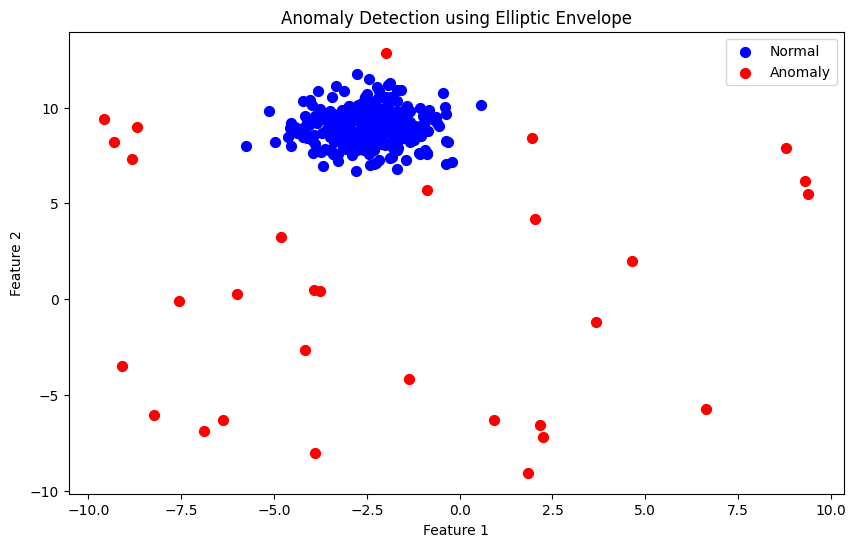

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic Gaussian data
n_samples = 300
n_outliers = 30  # Number of anomalies
random_state = 42

# Generate normal data (Gaussian blobs)
data, _ = make_blobs(n_samples=n_samples, centers=1, cluster_std=1.0, random_state=random_state)

# Add outliers (random noise)
rng = np.random.RandomState(random_state)
outliers = rng.uniform(low=-10, high=10, size=(n_outliers, 2))
data_with_outliers = np.vstack([data, outliers])

# Step 2: Apply Elliptic Envelope
elliptic = EllipticEnvelope(contamination=n_outliers / (n_samples + n_outliers), random_state=random_state)
elliptic.fit(data_with_outliers)

# Predict anomalies (-1: anomaly, 1: normal)
labels = elliptic.predict(data_with_outliers)

# Step 3: Visualize results
normal_points = data_with_outliers[labels == 1]
anomalies = data_with_outliers[labels == -1]

plt.figure(figsize=(10, 6))
plt.scatter(normal_points[:, 0], normal_points[:, 1], c='blue', s=50, label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', s=50, label='Anomaly')
plt.title("Anomaly Detection using Elliptic Envelope")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
